In [11]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [12]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    sr: float # score 
    bpd: float # balls per ...
    boundary_percent: float
    summary:str

In [25]:
def calculate_sr(state: BatsmanState):
    sr = (state['runs']/state['balls'])*100
    # state['sr'] = sr
    # return state
    ## send partial state
    return {'sr':sr}

In [14]:
def calculate_bpd(state: BatsmanState):
    bpd = state['balls']/(state['fours']+state['sixes'])
    # state['bpd'] = bpd
    # return state
    ## send partial state
    return {'bpd':bpd}

In [20]:
def calculate_boundry_percentage(state: BatsmanState):
    boundary_percent =  (((state['fours']*4)+(state['sixes']*6))/state['runs'])*100
    # state['boundary_percent'] = boundary_percent
    # return state
    ## send partial state
    return {'boundary_percent':boundary_percent}

In [21]:
def summary(state: BatsmanState):
    summary=f"""
Strike Rate - {state['sr']} \n
Balls Per Boundry - {state['bpd']} \n
Boundry Percent - {state['boundary_percent']}
"""
    # state['summary'] = summary
    # return state
    ## send partial state
    return {'summary':summary}

In [26]:
graph = StateGraph(BatsmanState)

# adding nodes
graph.add_node('calculate_sr', calculate_sr) # calcualte strike rate
graph.add_node('calculate_bpd', calculate_bpd) 
graph.add_node('calculate_boundry_percentage', calculate_boundry_percentage) 
graph.add_node('summary', summary) 

# adding edges
graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpd')
graph.add_edge(START,'calculate_boundry_percentage')

graph.add_edge('calculate_sr', 'summary')
graph.add_edge('calculate_bpd', 'summary')
graph.add_edge('calculate_boundry_percentage', 'summary')

graph.add_edge('summary', END)
workflow = graph.compile()

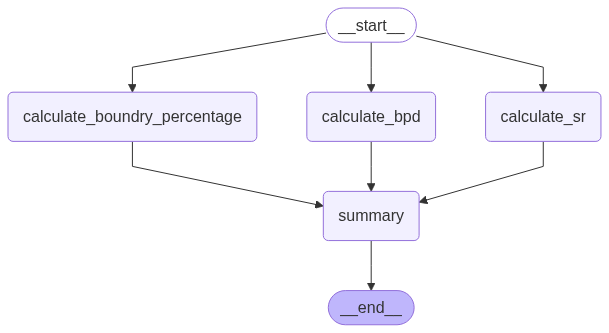

In [10]:
workflow

### rather than sending the entire state, send only particular state otherwise it will conflict in parallel execution

In [27]:
initial_state = {
    'runs' : 100,
    'balls':50,
    'fours': 6,
    'sixes': 4
}
final_state = workflow.invoke(initial_state)
final_state


{'runs': 100,
 'balls': 50,
 'fours': 6,
 'sixes': 4,
 'sr': 200.0,
 'bpd': 5.0,
 'boundary_percent': 48.0,
 'summary': '\nStrike Rate - 200.0 \n\nBalls Per Boundry - 5.0 \n\nBoundry Percent - 48.0\n'}